### TASK: To predict car's price from its specifications using Machine Learning.

### Installing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

#### Install PyCaret for model Training and other useful functionality like compare models.

In [2]:
!pip install -q pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.5 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.0 which is incompatible.
en-core-web-sm 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 2.3.7 which is incompatible.
en-core-web-lg 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 2.3.7 which is incompatible.


### Import and Looking data

In [3]:
data = pd.read_csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')
data.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4285,Maruti 800 DX,1998,70000,100000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
4198,Ford EcoSport 1.5 Diesel Titanium BSIV,2019,975000,30000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,205Nm@ 1750-3250rpm,5.0
4543,Maruti Vitara Brezza ZDi,2019,892000,10000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
4193,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
1134,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Performing EDA on Dataset

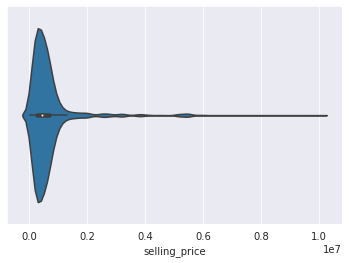

In [5]:
sns.violinplot(x = 'selling_price', data = data)
plt.show()

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

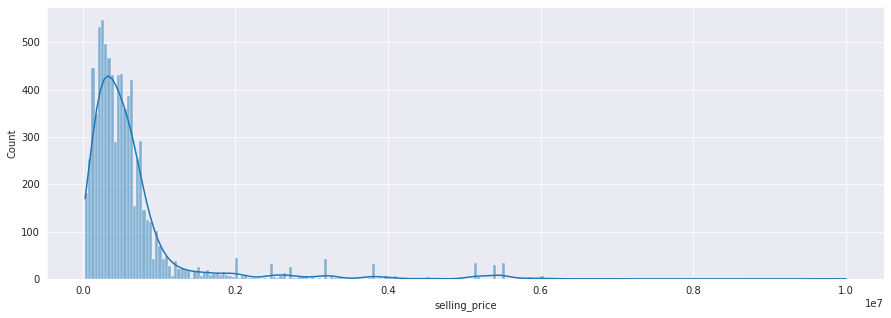

In [6]:
plt.figure(figsize= (15,5))
sns.histplot(x = 'selling_price', kde = True, data = data)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

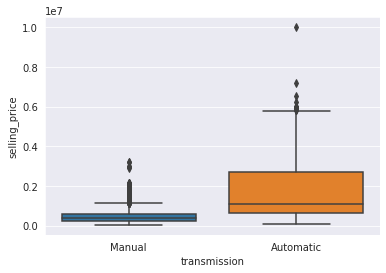

In [7]:
sns.boxplot(x= 'transmission' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

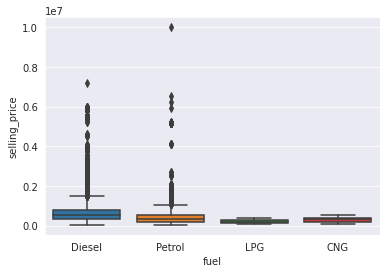

In [8]:
sns.boxplot(x= 'fuel' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

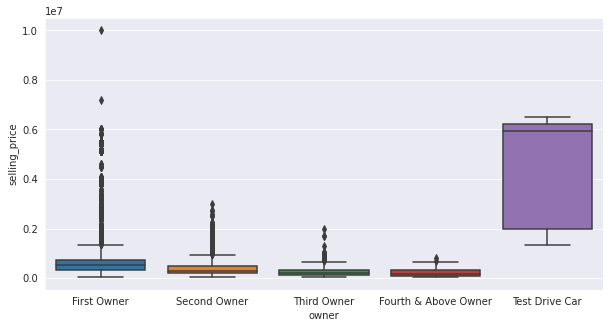

In [9]:
plt.figure(figsize = (10,5))
sns.boxplot(x= 'owner' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

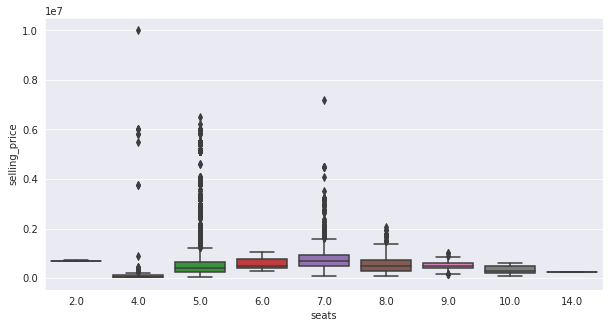

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(x= 'seats' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='year', ylabel='selling_price'>

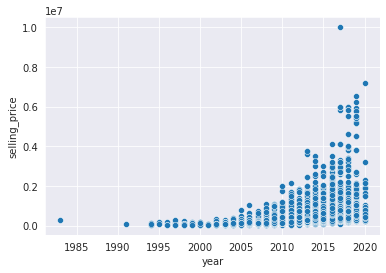

In [11]:
sns.scatterplot(x= 'year' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

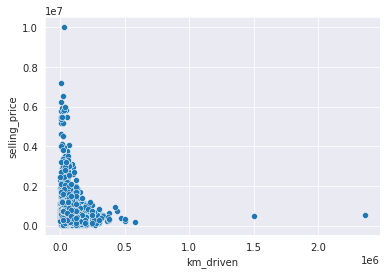

In [12]:
sns.scatterplot(x= 'km_driven' , y= 'selling_price', data = data)

#### Feature splitting for more analysis (taking 'brand' from Car Name)

In [13]:
data['car_name'] = data['name'].apply(lambda x: x.split(' ')[0])

#### Exploring data w.r.t car_brand

<AxesSubplot:xlabel='car_name', ylabel='selling_price'>

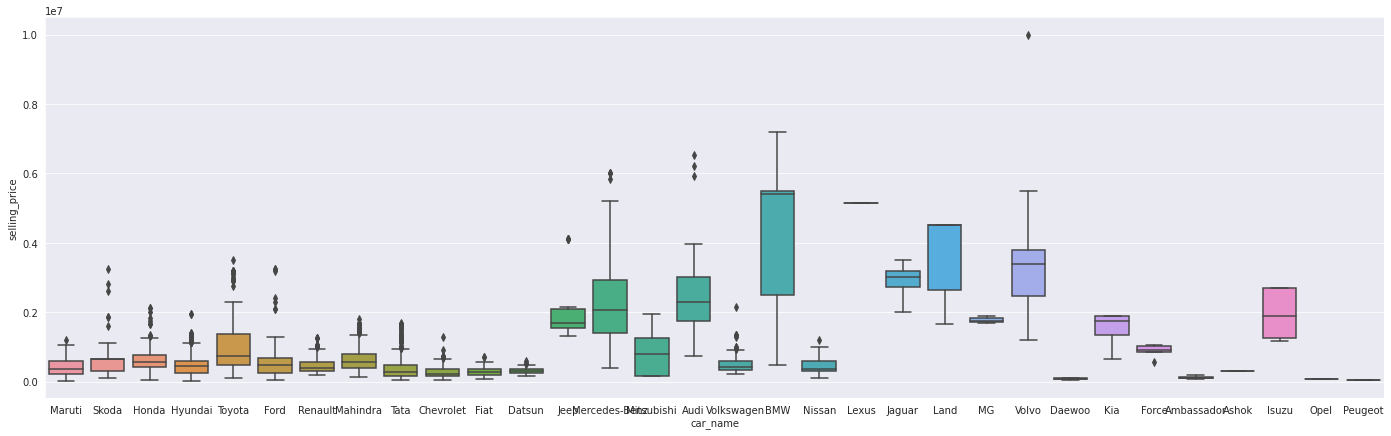

In [14]:
plt.figure(figsize = (24,7))
sns.boxplot(x= 'car_name' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

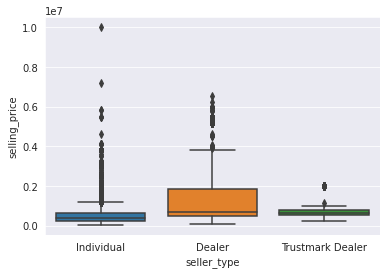

In [15]:
sns.boxplot(x= 'seller_type' , y= 'selling_price', data = data)

<AxesSubplot:xlabel='car_name', ylabel='count'>

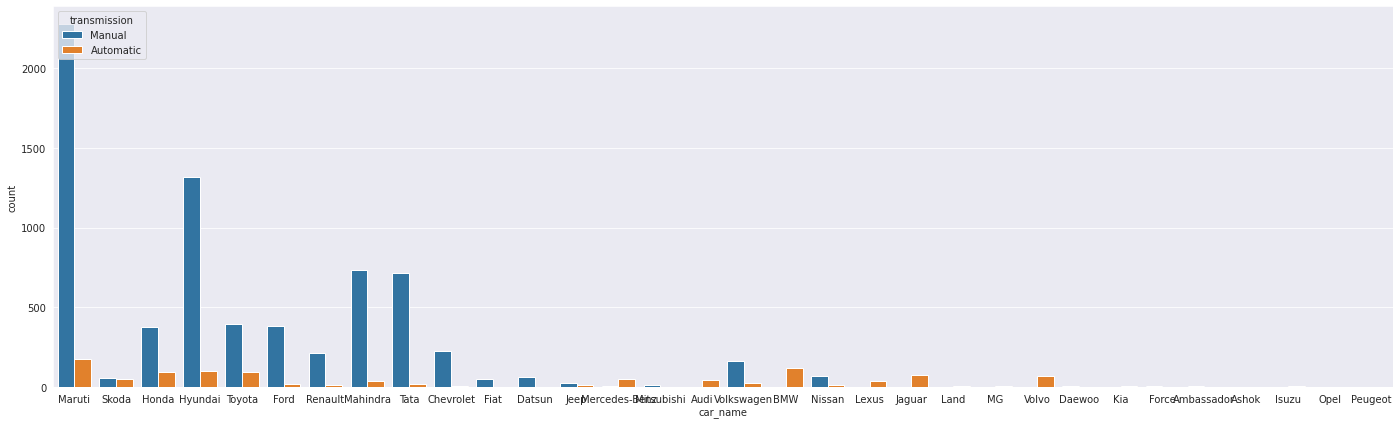

In [16]:
plt.figure(figsize = (24,7))
sns.countplot(x= 'car_name' ,hue= 'transmission', data = data)

### Feature Engineering

#### Removing missing values from the dataset

In [17]:
data = data.dropna(axis = 0).reset_index(drop = True)

#### Converting engine and Max Power to numerical (continous) data. 

In [18]:
data['engine'] = data['engine'].apply(lambda x: x.split(' ')[0]).astype(np.float)
data['max_power'] = data['max_power'].apply(lambda x: x.split(' ')[0]).astype(np.float)

#### Analysing Mileage

In [19]:
temp = data.dropna(axis = 0)
temp['mileage_unit_type'] = temp['mileage'].apply(lambda x: x.split(' ')[1])

<AxesSubplot:xlabel='mileage_unit_type', ylabel='count'>

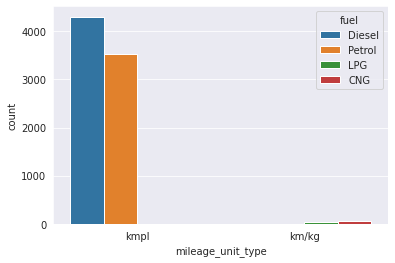

In [20]:
sns.countplot(x = 'mileage_unit_type', hue = 'fuel',data = temp)

#### Dropping Mileage because of different non-comparable units (kmpl (fuels in liquid state) and km/kg (fuels in gaseous state)).

In [21]:
data = data.drop(['name','torque','mileage'], axis =1)

In [22]:
data.sample(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,car_name
5076,2019,579000,10000,Petrol,Individual,Manual,First Owner,1197.0,83.10,5.0,Maruti
2003,2012,550000,130000,Diesel,Individual,Manual,First Owner,2179.0,140.00,7.0,Mahindra
80,2017,484999,10000,Petrol,Dealer,Manual,First Owner,998.0,67.04,5.0,Maruti
624,2011,270000,40000,Petrol,Individual,Manual,First Owner,998.0,67.10,5.0,Maruti
6413,2019,500000,5000,Petrol,Individual,Manual,First Owner,1086.0,68.00,5.0,Hyundai
3007,2017,450000,56290,Diesel,Dealer,Manual,First Owner,1186.0,73.97,5.0,Hyundai
6684,2018,300000,7000,Petrol,Individual,Manual,First Owner,999.0,67.00,5.0,Datsun
1684,2014,240000,50000,Petrol,Individual,Manual,First Owner,796.0,47.30,5.0,Maruti
7414,2017,934000,101000,Diesel,Individual,Manual,First Owner,1498.0,98.59,5.0,Ford
5075,2018,380000,19000,Petrol,Individual,Manual,First Owner,998.0,67.04,5.0,Maruti


#### Feature Encoding.

In [23]:
one_hot_encode = ['fuel']
label_encode = ['seller_type','owner', 'car_name']
mappings = [{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2},
            {'First Owner': 3,'Second Owner': 2,'Third Owner': 1,'Fourth & Above Owner': 0,'Test Drive Car': 4},
            {'Opel': 0,'Daewoo': 1,'Ambassador': 2,'Chevrolet': 3,'Ashok': 4,'Datsun': 5,'Fiat': 6,'Tata': 7,'Maruti': 8,'Renault': 9,'Nissan': 10,'Hyundai': 11,'Volkswagen': 12,'Ford': 13,'Honda': 14,'Skoda': 15,'Mahindra': 16,'Mitsubishi': 17,'Force': 18,'Toyota': 19,'Kia': 20,'MG': 21,'Isuzu': 22,'Jeep': 23,'Mercedes-Benz': 24,'Audi': 25,'Jaguar': 26,'Volvo': 27,'Land': 28,'BMW': 29,'Lexus': 30}
           ]


In [24]:
def one_hot_encoding(one_hot_encode, df):
    df = df.copy()
    for col in one_hot_encode:
        temp = pd.get_dummies(data[col], prefix = str(col))
        df = pd.concat([df.drop(col, axis =1), temp], axis = 1)
    return df
data = one_hot_encoding(one_hot_encode, data)

def label_encoding(label_encode,mappings, df):
    df = df.copy()
    for i in range(len(label_encode)):
        mapping = mappings[i]
        col = label_encode[i]
        df[col] = df[col].map(mapping) 
    return df
data = label_encoding(label_encode,mappings, data)

data['transmission'] = data['transmission'].map({'Manual':0,'Automatic':1})

In [25]:
data.sample(10)

,year,selling_price,km_driven,seller_type,transmission,owner,engine,max_power,seats,car_name,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
7172,2017,750000,51000,1,1,3,1197.0,81.80,5.0,8,0,0,0,1
3179,2019,750000,9900,0,0,3,1298.0,80.00,8.0,8,0,0,0,1
6533,2017,650000,40000,0,0,2,1248.0,73.74,7.0,3,0,1,0,0
7101,2017,650000,82050,0,0,3,1248.0,73.90,5.0,8,0,1,0,0
3123,2019,650000,33000,0,1,3,1197.0,81.80,5.0,8,0,0,0,1
5463,2016,2000000,68089,2,1,3,2494.0,157.70,5.0,19,0,0,0,1
2459,2012,320000,120000,0,0,2,1248.0,74.00,5.0,8,0,1,0,0
2474,2010,285000,155000,0,0,2,1586.0,103.30,5.0,8,0,0,0,1
2985,2015,503000,110000,0,0,3,2179.0,147.94,7.0,7,0,1,0,0
6996,2013,290000,40000,0,0,2,814.0,55.20,5.0,11,0,0,0,1


#### Understanding correlations between feature after preprocessing.

<AxesSubplot:>

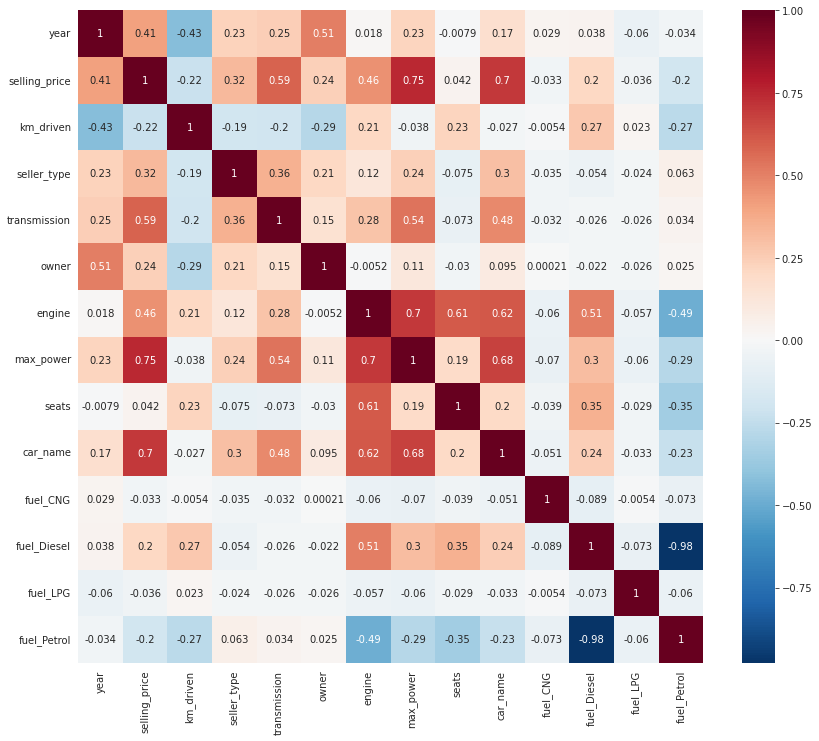

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(), data = data, center=0,annot = True ,cmap='RdBu_r') 

<AxesSubplot:xlabel='max_power', ylabel='engine'>

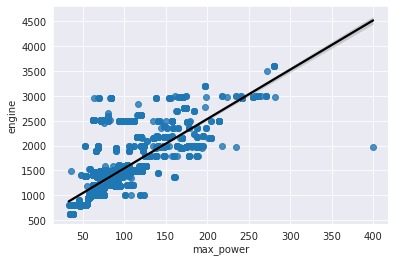

In [27]:
sns.regplot(x= 'max_power', y='engine', data = data, line_kws ={'color':'black'})

In [28]:
X = data.drop('selling_price', axis = 1)
y = data['selling_price']

#### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc = RobustScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns = [X.columns])

In [30]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

### Model Selection and Training

In [31]:
from pycaret.regression import setup, compare_models, create_model, tune_model, predict_model

In [32]:
_ = setup(data = pd.concat([X_train, y_train], axis =1), target = 'selling_price', silent = True)

,Description,Value
0,session_id,6307
1,Target,selling_price
2,Original Data,"(6324, 14)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4426, 13)"


In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,68155.1563,16737599312.1553,125800.9004,0.9734,0.2036,0.1517,1.5260
et,Extra Trees Regressor,70960.2888,18732593042.7942,133006.7754,0.9699,0.2238,0.1635,0.5070
lightgbm,Light Gradient Boosting Machine,73077.0221,18933610068.6226,133823.9936,0.9698,0.2111,0.1591,0.1500
xgboost,Extreme Gradient Boosting,69141.1428,19139154455.1720,134856.2727,0.9688,0.2186,0.1545,20.4380
rf,Random Forest Regressor,72120.8431,19266436112.1909,135417.2543,0.9685,0.2156,0.1608,0.6750
gbr,Gradient Boosting Regressor,83380.5928,20477957840.6045,140932.3361,0.9671,0.2375,0.1850,0.1570
dt,Decision Tree Regressor,87294.0492,33275854479.7300,178300.5253,0.9464,0.2727,0.1931,0.0180
knn,K Neighbors Regressor,98186.6636,40912061991.3889,197888.1001,0.9347,0.2664,0.2110,0.0400
ada,AdaBoost Regressor,249162.1240,92809783943.1343,304269.1018,0.8488,0.7149,0.9626,0.1110
br,Bayesian Ridge,265858.8071,184670142466.2609,427754.5917,0.7083,0.7136,0.7626,0.0150


In [34]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,62732.6097,9905485638.1661,99526.3063,0.9808,0.1982,0.1449
1,59886.9549,10641082228.8403,103155.6214,0.9803,0.2084,0.1523
2,66601.8580,12128436273.8611,110129.1799,0.9860,0.1999,0.1502
3,65355.2856,10457979909.8273,102264.2651,0.9880,0.2087,0.1537
4,72759.1090,23067057351.6895,151878.4295,0.9582,0.2168,0.1643
5,69695.4691,15348365741.6541,123888.5214,0.9656,0.1908,0.1421
6,68398.1320,14887797524.6296,122015.5626,0.9761,0.2035,0.1521
7,78277.6265,41828482042.4164,204520.1263,0.9517,0.1752,0.1341
8,71435.0060,16705697495.3144,129250.5222,0.9655,0.2265,0.1681
9,66409.5119,12405608915.1546,111380.4692,0.9813,0.2079,0.1553


In [35]:
y_pred = predict_model(catboost, data = X_test)['Label'].iloc[:,0]

### Results

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2= r2_score(y_test,y_pred)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/(X_test.shape[0]- X_test.shape[1]-1))

print('MAE : {:.4f}'.format(mae))
print('RMSE : {:.4f}'.format(rmse))
print('R2 Score : {:.4f}'.format(r2))
print('Adj R2 Score : {:.4f}'.format(adj_r2))

MAE : 70293.4088
RMSE : 129720.3467
R2 Score : 0.9746
Adj R2 Score : 0.9744


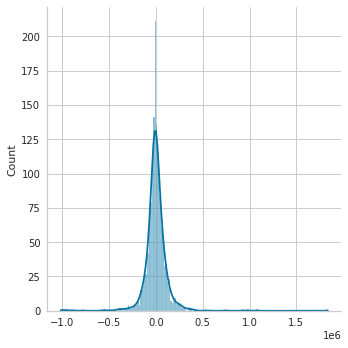

In [37]:
sns.displot(y_test - y_pred, kde = True)

<AxesSubplot:>

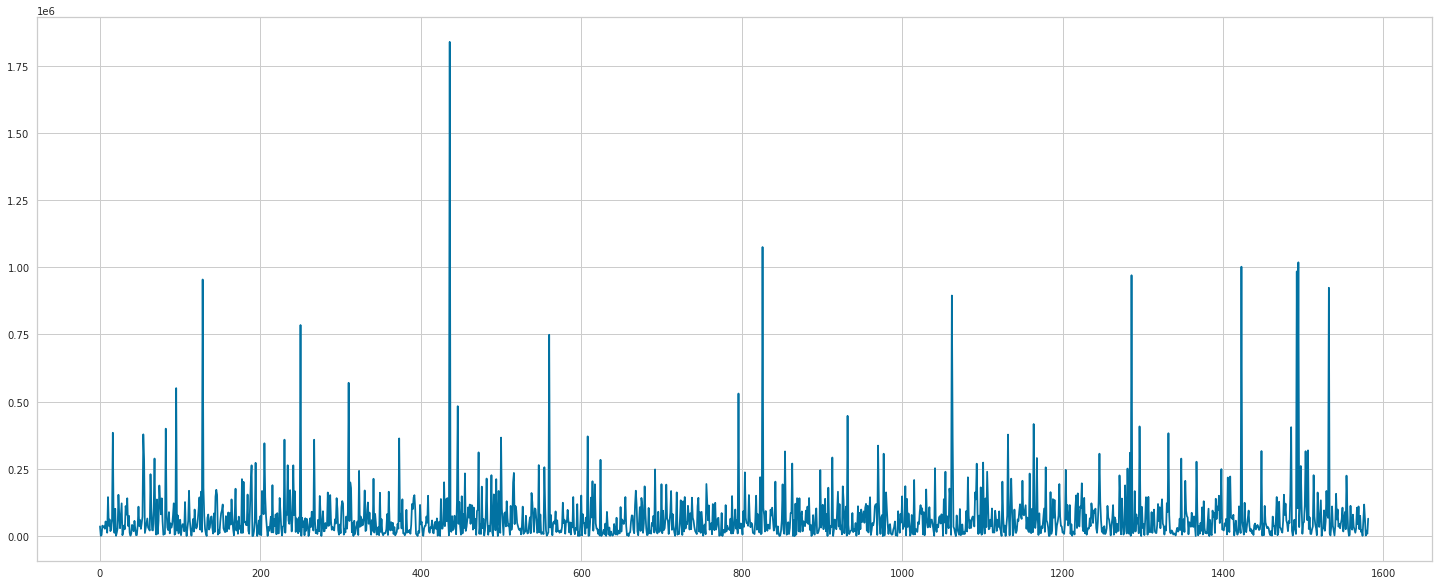

In [38]:
plt.figure(figsize = (25,10))
sns.lineplot(x = y_test.reset_index(drop = True).index,y = abs(y_pred - y_test).reset_index(drop = True))

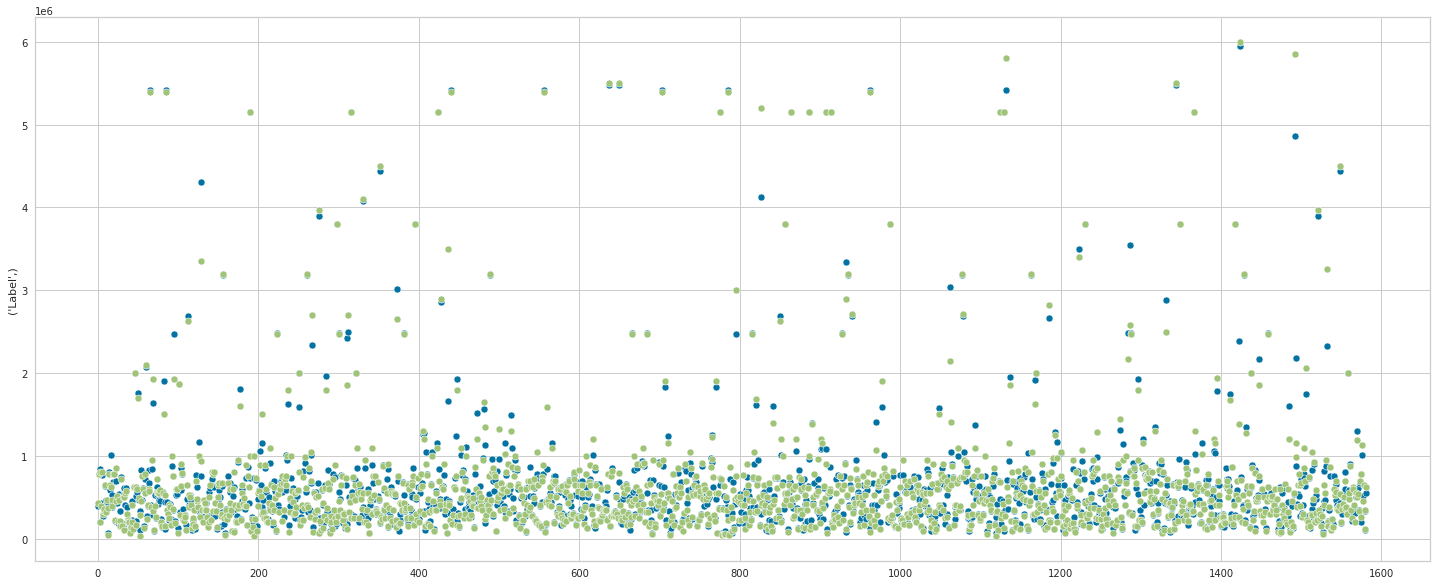

In [39]:
plt.figure(figsize = (25,10))
sns.scatterplot(x = y_pred.reset_index(drop = True).index,y = y_pred.reset_index(drop = True))
sns.scatterplot(x = y_test.reset_index(drop = True).index,y = y_test.reset_index(drop = True))
plt.show()